In [1]:
# Importo librerias

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot
from scipy.stats import chi2_contingency, mannwhitneyu
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Abro dataset
df = pd.read_csv("../data/marketing_campaign.csv", sep = ";")
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [3]:
# 2.1. EXPLORACION INCIAL

# Tipo de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
# Filas duplicadas
df.loc[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [6]:
# Valores nulos
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Num de valores unicos por columnas
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [9]:
# funcion para clasificar por cardinalidad

def cardinalidad(df_in, umbral_categoria=10, umbral_continua=30):
    
    # DataFrame inicial con cardinalidad, % de cardinalidad y columna Tipo (vacia)
    df_card = pd.DataFrame({
        "Card": df_in.nunique(),
        "%_Card": df_in.nunique() / len(df_in) * 100,
        "Clasificada_como": "" 
    })

    df_card.loc[df_card["Card"] == 2, "Clasificada_como"] = "Binaria"
    
    df_card.loc[
        (df_card["Card"] < umbral_categoria) & (df_card["Clasificada_como"] == ""), 
        "Clasificada_como"
    ] = "Categorica"
   
    df_card.loc[
        (df_card["Card"] >= umbral_categoria) & (df_card["%_Card"] >= umbral_continua * 100),
        "Clasificada_como"
    ] = "Numerica Continua"    
    
    df_card.loc[
        (df_card["Card"] >= umbral_categoria) & (df_card["%_Card"] < umbral_continua * 100),
        "Clasificada_como"
    ] = "Numerica Discreta"

    return df_card  # .reset_index().rename(columns={"index": "Columna"})

In [ ]:
# Cardinalidad
df.nunique() / len (df) *100
cardinalidad(df)

,Card,%_Card,Clasificada_como
ID,2240,100.000000,Numerica Discreta
Year_Birth,59,2.633929,Numerica Discreta
Education,5,0.223214,Categorica
Marital_Status,8,0.357143,Categorica
Income,1974,88.125000,Numerica Discreta
Kidhome,3,0.133929,Categorica
Teenhome,3,0.133929,Categorica
Dt_Customer,663,29.598214,Numerica Discreta
Recency,100,4.464286,Numerica Discreta
MntWines,776,34.642857,Numerica Discreta


In [11]:
# 2.2. CLASIFICACION DE LAS VARIABLES

| Columna/Variable       | Descripción                      | Tipo de variable  | Importancia Inicial | Nota                      |
|------------------------|----------------------------------|-------------------|---------------------|---------------------------|
| ID                     | Identificador único del cliente  |  Numérica         |  3                  | Poco util. Solo para identificar   |
| Year_Birth             | Año de nacimiento                |  Numérica         |  1                  | Obtener edad    |
| Education              | Nivel educativo                  |   Categórica      |  1                  | Analizar por niv. educativos. Hipotesis ppal|
| Marital_Status         | Estado civil                     |   Categórica      |  1                  | Para hipotesis derivadas   |
| Income                 | Ingresos anuales                 |  Numérica         |  0                  | Clave para hipotesis. Tiene valores nulos   |
| Kidhome                | Número de niños en el hogar      |  Numérica         |  2                  | Interesante para patrones de gastos    |
| Teenhome               | Número de adolescentes en el hogar  |   Numérica     |  2                  | Interesante para patrones de gastos    |   
| Dt_Customer            | Fecha en la que se unió el cliente  |   Fecha        |  2                  | Mide la antiguedad                     |
| Recency                | Días desde la última compra      |  Numérica         |  0                  | Esencial para evaluar retención de clientes |
| MntWines               | Gasto en vinos                   |  Numérica         |  1                  | Da info directa sobre el habito de compra    |
| MntFruits              | Gasto en frutas                  |  Numérica         |  1                  | Da info directa sobre el habito de compra    |
| MntMeatProducts        | Gasto en productos cárnicos      |  Numérica         |  1                  | Da info directa sobre el habito de compra    |
| MntFishProducts        | Gasto en productos de pescado    |  Numérica         |  1                  | Da info directa sobre el habito de compra    |
| MntSweetProducts       | Gasto en dulces                  |  Numérica         |  1                  | Da info directa sobre el habito de compra    |
| MntGoldProds           | Gasto en productos premium       |   Numérica        |  1                  | Da info directa sobre el habito de compra producto de luj|
| NumDealsPurchases      | Compras con descuento            |  Numérica         |  2                  | Respuesta a los cambios de precio       |
| NumWebPurchases        | Compras a través de la web       |    Numérica       |  2                  | Interesante como info sobre canal de venta |
| NumCatalogPurchases    | Compras a través de catálogo     |   Numérica        |  2                  | Interesante como info sobre canal de venta |  
| NumStorePurchases      | Compras en tienda física         |   Numérica        |  2                  | Interesante como info sobre canal de venta | 
| NumWebVisitsMonth      | Visitas web en el último mes     |   Numérica        |  2                  | Interesante como info sobre canal de venta | 
| AcceptedCmp3           | Aceptó campaña 3                 |  Binaria          |  2                  | Mide respuesta a campañas de Marketing   |
| AcceptedCmp4           | Aceptó campaña 4                 | Binaria           |  2                  | Mide respuesta a campañas de Marketing   |       
| AcceptedCmp5           | Aceptó campaña 5                 | Binaria           |  2                  | Mide respuesta a campañas de Marketing   | 
| AcceptedCmp1           | Aceptó campaña 1                 | Binaria           |  2                  | Mide respuesta a campañas de Marketing   | 
| AcceptedCmp2           | Aceptó campaña 2                 |  Binaria          |  2                  | Mide respuesta a campañas de Marketing   | 
| Complain               | Presentó alguna queja            |  Binaria          |  2                  | Evalua insastifacción del cliente      |
| Z_CostContact          | Desconocido                      |                   |                      | ¿Qué representa?         |
| Z_Revenue              | Desconocido                      |                   |                      | ¿Qué representa?         |
| Response               | Respondió a la última campaña    |  Binaria          |  2                  | Mide interes reciente      |


#### 3. DATA CLEANING

In [12]:
# 3.2 BORRO COLUMNAS que no me sirven
df.drop(columns= ["Z_CostContact", "Z_Revenue"], axis =1, inplace = True )

In [13]:
# 3.3 Formato de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
print(df["Dt_Customer"].dtypes)
print(df["Dt_Customer"])

object
0       04/09/2012
1       08/03/2014
2       21/08/2013
3       10/02/2014
4       19/01/2014
           ...    
2235    13/06/2013
2236    10/06/2014
2237    25/01/2014
2238    24/01/2014
2239    15/10/2012
Name: Dt_Customer, Length: 2240, dtype: object


In [15]:
# FECHA
# Conversion a formato fecha
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True) #dayfirst porque mi formato es "%d/%m/%Y" (día/mes/año)

# BOOLEANOS
# Convertir columnas específicas de 0/1 a booleanas
boolean_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
df[boolean_cols] = df[boolean_cols].astype('bool')

# ENTEROS
# Recorrer todas las columnas del DataFrame
for col in df.select_dtypes(include=["int", "int64"]).columns:
    df[col] = df[col].astype("int")  # Asegurar que sean entero

# FLOAT
# Me aseguro por si hubiera algun valor no numerico (a priori parecen todos numericos salvos los missing)
df["Income"] = pd.to_numeric(df["Income"], errors="coerce")


In [16]:
# Filas missing con NaN en Income
df.loc[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,False,False,False,False,False,False,False
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,False,False,False,False,False,False,False
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,False,False,False,False,False,False,False
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,False,False,False,False,False,False,False
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,False,False,False,False,False,False,False
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,False,False,False,False,False,False,False
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,False,False,False,False,False,False,False
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,False,False,False,False,False,False,False
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,False,False,False,False,False,False,False
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,False,False,False,False,False,False,False


In [17]:
# Compruebo Media y Mediana
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: >

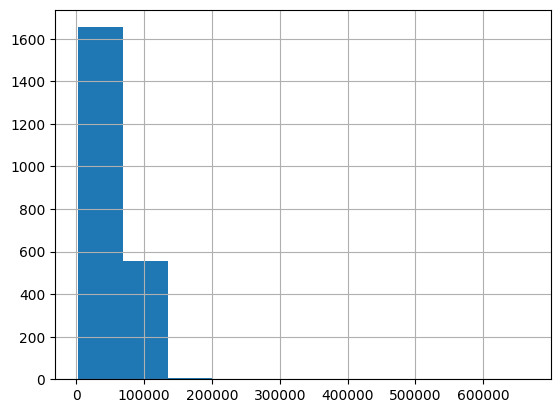

In [18]:
# Compruebo distribución
df['Income'].hist()

In [19]:
# Identifico outlier (solo hay uno)
df[df['Income'] > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,1,3,6,False,False,False,False,False,False,False


In [20]:
# Pese a que la media y mediana son parecidas, el hecho de que haya un outlier tan extremo sustituire los NaN por la mediana

df.loc[df["Income"].isna(), "Income"] = df["Income"].median()

In [21]:
df["Income"].isna().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [23]:
# 3.4. Deteccion de otros outliers
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2240.0,52237.975446,1730.0,35538.75,51381.5,68289.75,666666.0,25037.955891
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [24]:
# Veo solo extraño, el outlier max en INCOME y el MIN en Year_Birth

***Year_Birth***

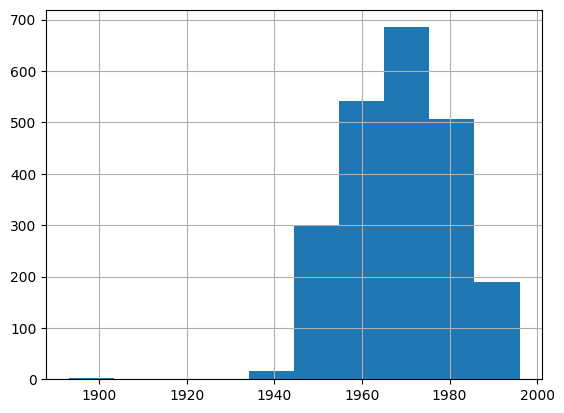

In [25]:
df.Year_Birth.hist();

In [26]:
df.loc[df.Year_Birth < 1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,5,False,False,False,False,False,True,False
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,False,False,False,False,False,False,False
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,6,4,1,False,False,True,False,False,False,False


Parecen errores de edad, de personas con mas de 100 años, por lo que lo conveniente será eliminar estos outlier extremos

In [27]:
# me creo copia de seguridad y elimino las filas de edad extremas (>100)
backup_v1 = df.copy()
df = df.loc[df.Year_Birth > 1920]

In [28]:
df.loc[df.Year_Birth < 1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


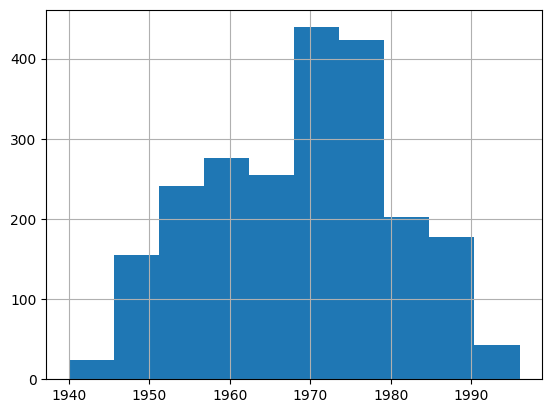

In [29]:
df.Year_Birth.hist();

***Income***

<Axes: >

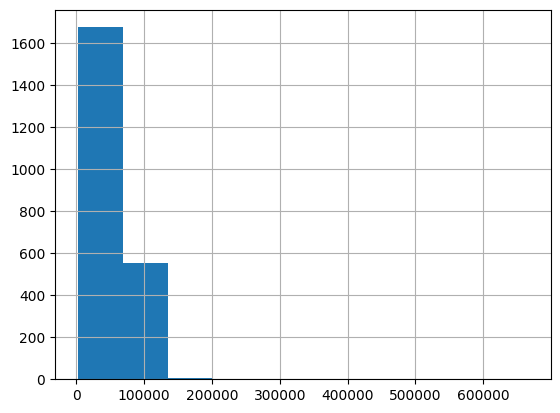

In [30]:
df.Income.hist()

In [31]:
# Identifico outlier (solo hay uno)
df.loc[df['Income'] > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,1,3,6,False,False,False,False,False,False,False


In [32]:
# Compruebo como afecta a la media ese outlier
income_mean = df['Income'].mean()
income_mean_no_outlier = df[df['Income'] < 150000]['Income'].mean()
print(f"Media con outlier: {income_mean}")
print(f"Media sin outlier: {income_mean_no_outlier}")
print(f"Mediana: {df['Income'].median()}")

Media con outlier: 52227.40768886902
Media sin outlier: 51619.5042620009
Mediana: 51381.5


Vemos  que la influencia es mínima, por lo que podemos mantener el outlier (aunque se trata de un outlier atipico)

In [33]:
# 3.5 TRATAMIENTOS ESPECIALES

backup_v2 = df.copy()

In [34]:
# nueva Columna edad
df["Age"] = 2024 - df["Year_Birth"]

In [35]:
# valores extraños en categoria Marital_Status
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [36]:
 df.loc[(df["Marital_Status"] == "Absurd") | (df["Marital_Status"] == "YOLO")]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,7,1,False,False,True,True,False,False,True,31
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,6,2,False,False,False,False,False,False,False,67
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,6,8,False,False,False,False,False,False,False,51
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,6,8,False,False,False,False,False,False,True,51


Voy a borrar esas filas

In [37]:
# Borrado de filas
Valores_a_borrar = df[(df["Marital_Status"] == "Absurd") | (df["Marital_Status"] == "YOLO")].index
df.drop(index=Valores_a_borrar, inplace=True)

In [38]:
# Agrupo las categorias en Together y Single
df["Marital_Status"] = df["Marital_Status"].replace(["Married"],"Together")
df["Marital_Status"] = df["Marital_Status"].replace(["Divorced", "Widow", "Alone"],"Single")

df["Marital_Status"].value_counts()

Marital_Status
Together    1443
Single       790
Name: count, dtype: int64

In [39]:
# Simplifico y agrupo las categorias de Education
df["Education"] = df["Education"].replace({"Basic":"Undergraduate",
                                                 "2n Cycle":"Undergraduate", 
                                                 "Graduation":"Graduate", 
                                                 "Master":"Postgraduate", 
                                                 "PhD":"Postgraduate"})
df["Education"].value_counts()

Education
Graduate         1126
Postgraduate      852
Undergraduate     255
Name: count, dtype: int64

In [40]:
# Nueva columnas de niños (independiente de que edad tengan)
df["Kids"] = df["Kidhome"] + df["Teenhome"]

In [41]:
# Nueva columna con el total gastado. Axis 1 (suma por filas)
df["Total_Spent"] = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)

In [42]:
backup_v3 = df.copy()

In [43]:
# Renombro columnas para que quede mas claro
df=df.rename(columns={"MntWines": "Wines",
                      "MntFruits":"Fruits",
                      "MntMeatProducts":"Meat",
                      "MntFishProducts":"Fish",
                      "MntSweetProducts":"Sweets",
                      "MntGoldProds":"Gold",
                      "NumDealsPurchases": "Deals",
                      "NumWebPurchases": "Webs",
                      "NumCatalogPurchases" : "Catalog",
                      "NumStorePurchases" : "Store",
                      "NumWebVisitsMonth" : "Web_Visist",
                      "AcceptedCmp3" : "Acc_Cmp3",
                      "AcceptedCmp4" : "Acc_Cmp4",
                      "AcceptedCmp5" : "Acc_Cmp5",
                      "AcceptedCmp1" : "Acc_Cmp1",
                      "AcceptedCmp2" : "Acc_Cmp2",                                   
                      })
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Acc_Cmp3,Acc_Cmp4,Acc_Cmp5,Acc_Cmp1,Acc_Cmp2,Complain,Response,Age,Kids,Total_Spent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,False,False,False,False,False,False,True,67,0,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,False,False,False,False,False,False,False,70,2,27
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,False,False,False,False,False,False,False,59,0,776
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,False,False,False,False,False,False,False,40,1,53
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,...,False,False,False,False,False,False,False,43,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Together,61223.0,0,1,2013-06-13,46,709,...,False,False,False,False,False,False,False,57,1,1341
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,...,False,False,False,True,False,False,False,78,3,444
2237,7270,1981,Graduate,Single,56981.0,0,0,2014-01-25,91,908,...,False,True,False,False,False,False,False,43,0,1241
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,False,False,False,False,False,False,False,68,1,843


In [44]:
# de gastos por tipologia

print(round(df["Wines"].mean(),2))
print(round(df["Meat"].mean(),2))
print(round(df["Fish"].mean(),2))
print(round(df["Fruits"].mean(),2))
print(round(df["Sweets"].mean(),2))
print(round(df["Gold"].mean(),2))

303.93
166.89
37.4
26.24
27.09
43.83


In [45]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'Deals', 'Webs', 'Catalog', 'Store', 'Web_Visist',
       'Acc_Cmp3', 'Acc_Cmp4', 'Acc_Cmp5', 'Acc_Cmp1', 'Acc_Cmp2', 'Complain',
       'Response', 'Age', 'Kids', 'Total_Spent'],
      dtype='object')

In [46]:
# Reorden de col (con aquellas que me interesan) y me quedo con las que pueden ser interesan

new_col_order = ["Age", "Education", "Marital_Status", "Income", "Kids","Dt_Customer", "Recency","Complain",    # PEOPLE
                 "Wines","Fruits", "Meat", "Fish", "Sweets", "Gold", "Total_Spent",                                     # PRODUCT
                 "Deals","Acc_Cmp1", "Acc_Cmp2" , "Acc_Cmp3" , "Acc_Cmp4" , "Acc_Cmp5", "Response",             # PROMO
                 "Store", "Catalog","Webs","Web_Visist"]                                                        # PLACE
              
df = df[new_col_order]
df


,Age,Education,Marital_Status,Income,Kids,Dt_Customer,Recency,Complain,Wines,Fruits,...,Acc_Cmp1,Acc_Cmp2,Acc_Cmp3,Acc_Cmp4,Acc_Cmp5,Response,Store,Catalog,Webs,Web_Visist
0,67,Graduate,Single,58138.0,0,2012-09-04,58,False,635,88,...,False,False,False,False,False,True,4,10,8,7
1,70,Graduate,Single,46344.0,2,2014-03-08,38,False,11,1,...,False,False,False,False,False,False,2,1,1,5
2,59,Graduate,Together,71613.0,0,2013-08-21,26,False,426,49,...,False,False,False,False,False,False,10,2,8,4
3,40,Graduate,Together,26646.0,1,2014-02-10,26,False,11,4,...,False,False,False,False,False,False,4,0,2,6
4,43,Postgraduate,Together,58293.0,1,2014-01-19,94,False,173,43,...,False,False,False,False,False,False,6,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Graduate,Together,61223.0,1,2013-06-13,46,False,709,43,...,False,False,False,False,False,False,4,3,9,5
2236,78,Postgraduate,Together,64014.0,3,2014-06-10,56,False,406,0,...,True,False,False,False,False,False,5,2,8,7
2237,43,Graduate,Single,56981.0,0,2014-01-25,91,False,908,48,...,False,False,False,True,False,False,13,3,2,6
2238,68,Postgraduate,Together,69245.0,1,2014-01-24,8,False,428,30,...,False,False,False,False,False,False,10,5,6,3


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Age             2233 non-null   int64         
 1   Education       2233 non-null   object        
 2   Marital_Status  2233 non-null   object        
 3   Income          2233 non-null   float64       
 4   Kids            2233 non-null   int64         
 5   Dt_Customer     2233 non-null   datetime64[ns]
 6   Recency         2233 non-null   int64         
 7   Complain        2233 non-null   bool          
 8   Wines           2233 non-null   int64         
 9   Fruits          2233 non-null   int64         
 10  Meat            2233 non-null   int64         
 11  Fish            2233 non-null   int64         
 12  Sweets          2233 non-null   int64         
 13  Gold            2233 non-null   int64         
 14  Total_Spent     2233 non-null   int64         
 15  Deals    

In [49]:
df.to_csv("../data/marketing_campaign_clean.csv", index=False )